### setup ----------------------------------------------------------

In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iri = datasets.load_iris()
iri.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
df_iri = pd.DataFrame(iri.data, columns=iri.feature_names)

In [4]:
# to allow coloring by species below
df_iri['species'] = iri.target

In [5]:
# df_iri.columns

### matplotlib pyplot ---------------------------------------------

In [6]:
%matplotlib inline

(array([ 41.,   8.,   1.,   7.,   8.,  33.,   6.,  23.,   9.,  14.]),
 array([ 0.1 ,  0.34,  0.58,  0.82,  1.06,  1.3 ,  1.54,  1.78,  2.02,
         2.26,  2.5 ]),
 <a list of 10 Patch objects>)

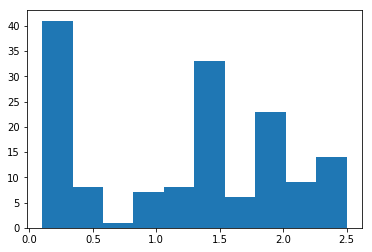

In [7]:
plt.hist(df_iri['petal width (cm)']) # through matplotlib 

# vs
# df_iri['petal width (cm)'].plot.hist()  # matpotlib through pandas

TypeError: hist() got multiple values for argument 'bins'

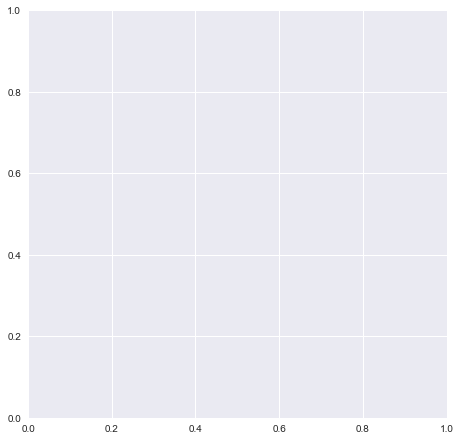

In [32]:
# distinguishing species by color = argh!

# plt.hist(df_iri['petal width (cm)'],color=df_iri['species']) # through matplotlib 

cp = ['C0','C1','C2','C3'] # new colors

# MATPLOTLIB - adapted from here: https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))
 
for i, s in enumerate(df_iri.species.unique()):
    df_tmp = df_iri[df_iri.species == s]
    ax.hist(df_tmp['petal length (cm)'], df_tmp['petal width (cm)'], 
               label=s, color=cp[i],bins=10)
 
ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')
 
ax.legend(loc=2)

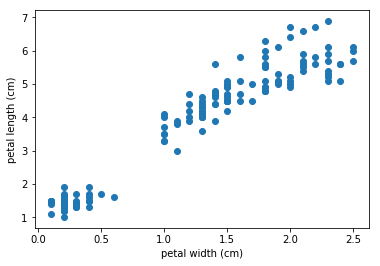

In [9]:
plt.scatter(df_iri['petal width (cm)'], df_iri['petal length (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')

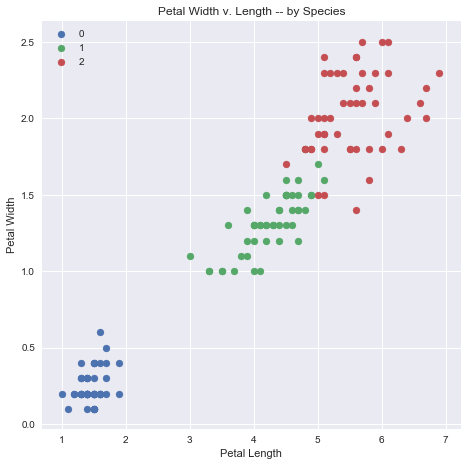

In [33]:
# cp=['b', 'g', 'r', 'c', 'm', 'y', 'k'] # old colors
cp = ['C0','C1','C2','C3'] # new colors

# MATPLOTLIB - adapted from here: https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))
 
for i, s in enumerate(df_iri.species.unique()):
    df_tmp = df_iri[df_iri.species == s]
    ax.scatter(df_tmp['petal length (cm)'], df_tmp['petal width (cm)'], 
               label=s, color=cp[i])
 
ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')
 
ax.legend(loc=2)

### matplotlib w/ seaborn ---------------------------------------

In [10]:
import seaborn as sns

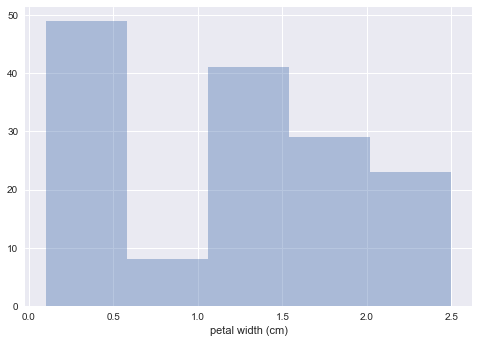

In [11]:
sns.distplot(df_iri['petal width (cm)'],kde=False) # default # of bins

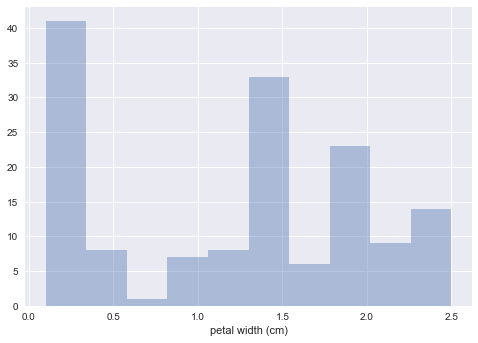

In [12]:
sns.distplot(df_iri['petal width (cm)'], kde=False, bins=10)

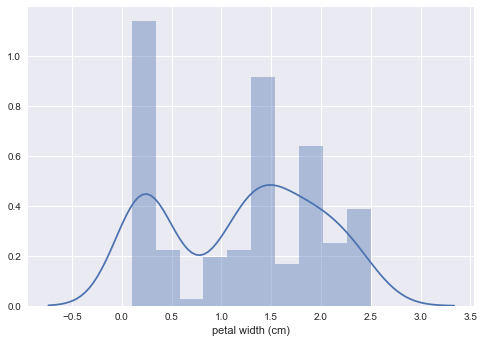

In [13]:
sns.distplot(df_iri['petal width (cm)'], bins=10)

ValueError: color kwarg must have one color per dataset

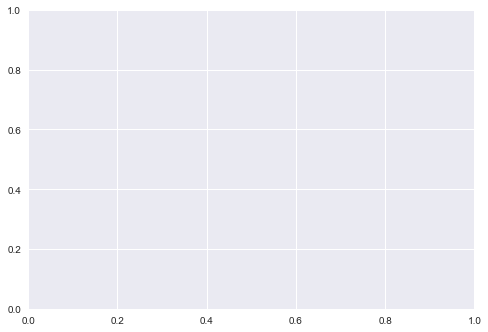

In [17]:
# species by color = argh!

# sns.distplot(df_iri['petal width (cm)'], bins=10, hue_order = df_iri['species'])

sns.distplot(df_iri[df_iri['species']==0], bins=10) #, color='b') # hue='species') # color = 'b' ) # hue_order=df_iri.species)

#sns.distplot.set_facecolor('b')

# df_iri.columns # checking

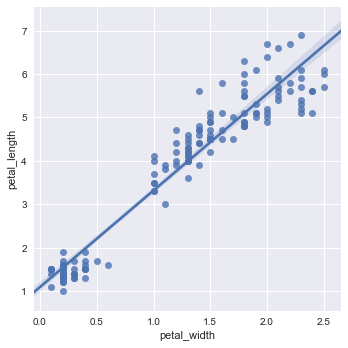

In [18]:
dfi = pd.DataFrame(columns=['petal_width','petal_length'])

dfi.petal_width = df_iri['petal width (cm)']
dfi.petal_length = df_iri['petal length (cm)']

# dfi.describe()
sns.lmplot(x='petal_width',y='petal_length',data=dfi)

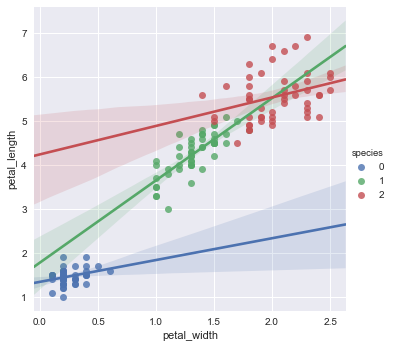

In [27]:
dfi['species'] = df_iri.species

sns.lmplot(x='petal_width',y='petal_length',hue='species',data=dfi)

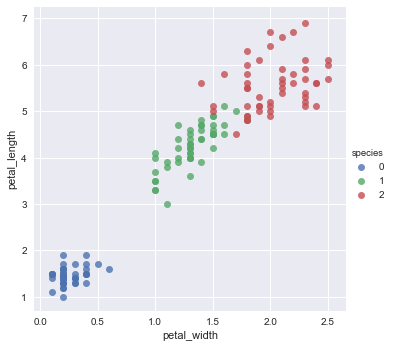

In [28]:
sns.lmplot(x='petal_width',y='petal_length',hue='species', fit_reg=False, data=dfi)

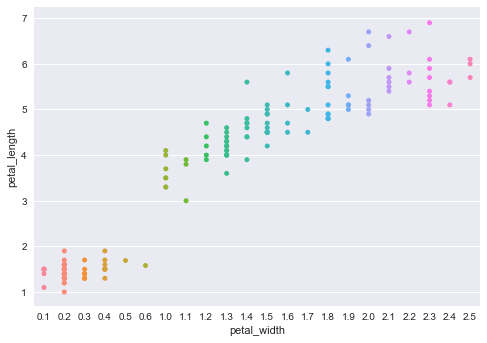

In [19]:
sns.stripplot(x='petal_width',y='petal_length',data=dfi)

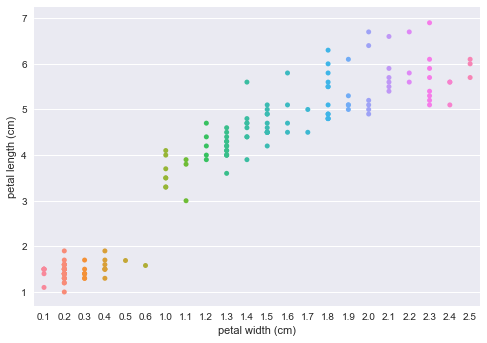

In [20]:
# w uncleaned df - woah. it works!
sns.stripplot(x='petal width (cm)',y='petal length (cm)',data=df_iri)

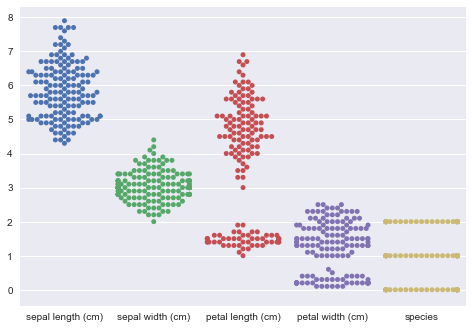

In [21]:
sns.swarmplot(data=df_iri)

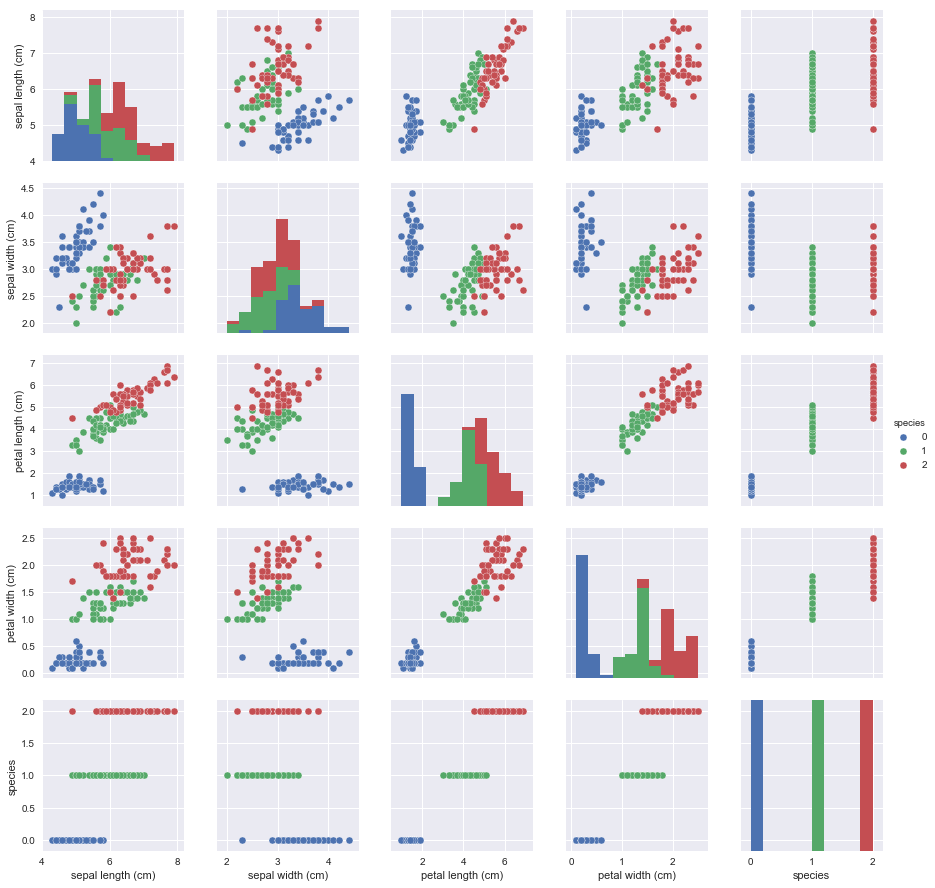

In [22]:
sns.pairplot(df_iri, hue='species')

In [ ]:
#### from here: https://stackoverflow.com/questions/4389179/matplotlib-color-palette
import pylab as py
import numpy as np
import matplotlib.cm as cm
a = np.arange(0,10)

py.figure()
for i in np.arange(10):
    c = cm.hot(i/10.,1)
    py.plot(a,i*a,color=c)

py.show()

### ggplot ---------------------------------------------------------